# Lab Activity Week 6

**Homework** Anythin you do not complete in lab is your homework. Please provide a link to your github repository as your homework submission.

### Step 1: Aquiring data

- Collect data from your weather and air quality sensors together (in the same script) for 5 minutes, taking a reading every second. 
- Make the name of the file saving the data something that is unique each time data is recorded. 
   - **HINT:** You can include the time as part of the file name, for example.
- Upload your new data to your git repository on GitHub and update the version of your respository on your laptop

### Step 2: Acquiring outdoor data
- Restart your raspberry pi system, powering it with the supplied batteries, rather than the power adaptor.
- Add a time delay to the start of your data acquisition script (as an optional user input)
- Start your data aquisition to again collect data for 5 minutes, taking readings every second, but this time with an initial ~2 minute delay (so it should run for ~7 minutes total).
- Take the whole system outdoors and wait there for the 5 minutes of data acquisition to complete.
- At your stations, again push your new data to your git repository on GitHub

### Step 3: Plotting indoor data
- Create a new Jupyter notebook and load (using pandas, for example) the data you now have from your device.
- Plot each type of data as a frequency distribution (histogram) with appropriate binning - meaning the distribution shows a good level of detail but does not have binning artifacts
- Using the mean and standard deviation of each set of data, does any of the data you have recorded look like it is well described by a normal distribution?
  - Using the mean and standard deviation, try plotting a Gaussian function along with each of your frequency distributions and see how well they match.

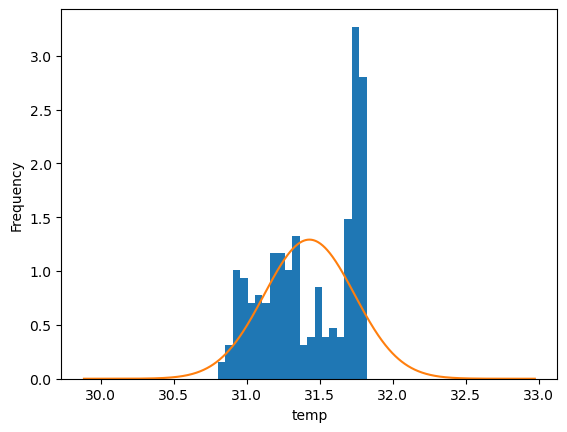

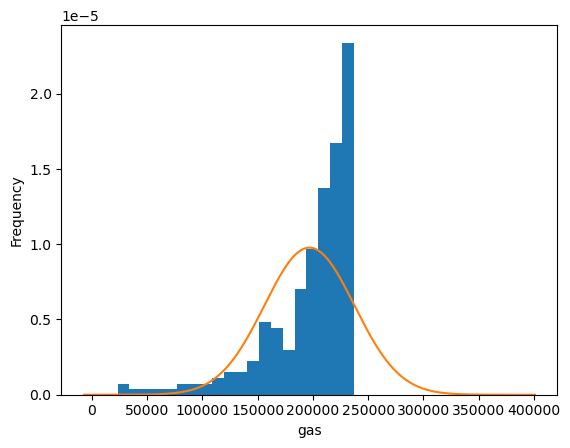

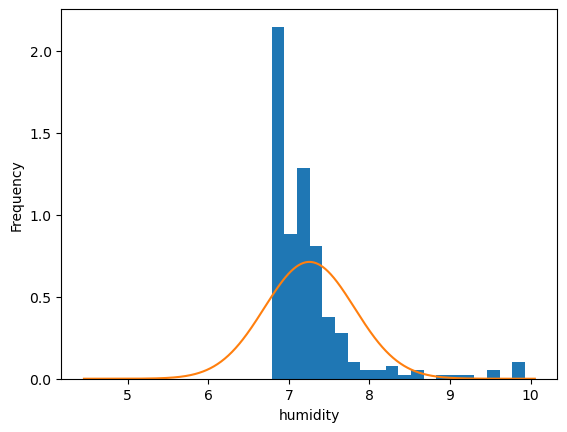

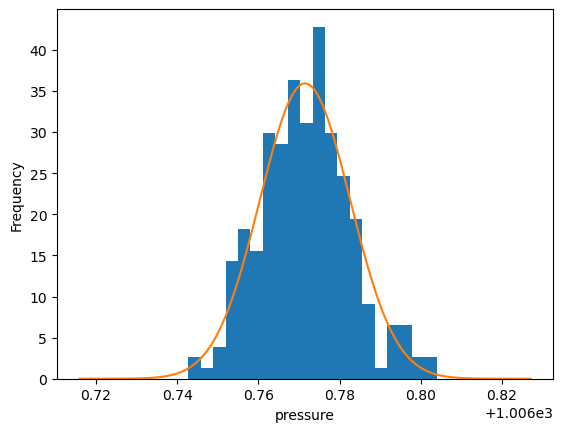

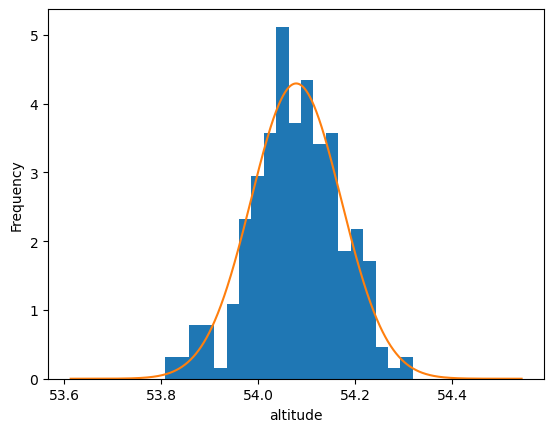

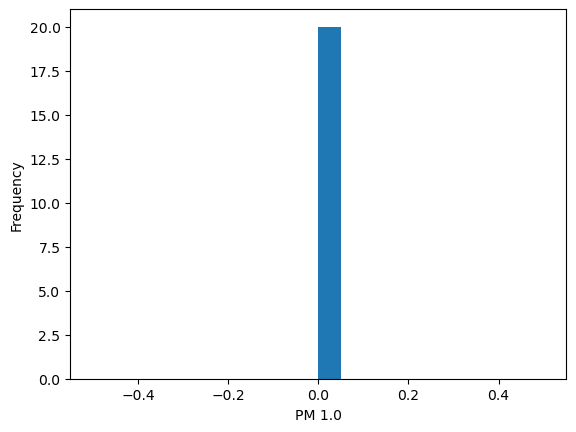

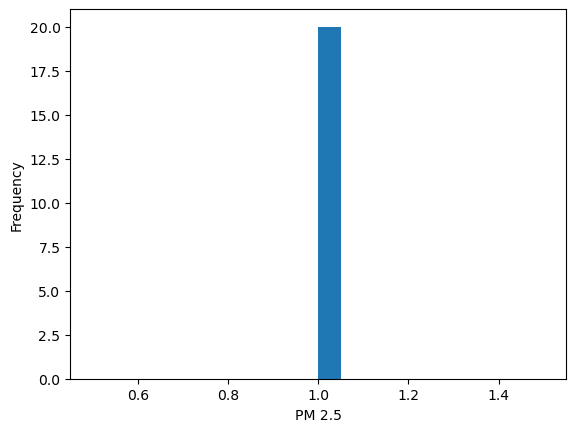

In [20]:
#Indoor 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Read the CSV file
datafile = r'C:\Users\erich\Downloads\fridayl.csv'

# Read the CSV file
data = pd.read_csv(datafile)

# Define a time array
time = range(len(data))

# Plot each column against time in a separate plot 
for col in data.columns[2:9]:
    plt.hist(data[col], bins=20, density=True)
    mu = np.mean(data[col])
    sigma = np.std(data[col])
    if sigma != 0:
        x = np.linspace(mu - 5*sigma, mu + 5*sigma, 1000)
        y= norm.pdf(x,mu,sigma)
        plt.plot(x,y, label = "p(x)")

    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

### Step 4: Comparing Indoor vs Outdoor data
- Produce the same plots as in Step 2 for your new outdoor data
- Now produce plots that compare indoors vs outdoors for each of your data types - don't forget labels
- Comment on your results
- Compare the mean and standard deviation values for each set of indoor data versus outdoor data, are they in agreement?
  - NOTE: The variance in your data is not the uncertainty on the mean (central limit theorem)
  - what is your mean uncertainty?
  - How many inside mean standard deviations (1 sigma uncertainty) are your inside and outside measurements separated by?
- If your distributions were not well described by a Gaussian, do you think you took enough data for the central limit theorem to apply?

The mean uncertainty for outdoors is 0.03353233081896239
The mean uncertainty for indoors is 0.019446558667930967
Number of inside mean standard deviations: 12.82960348096701


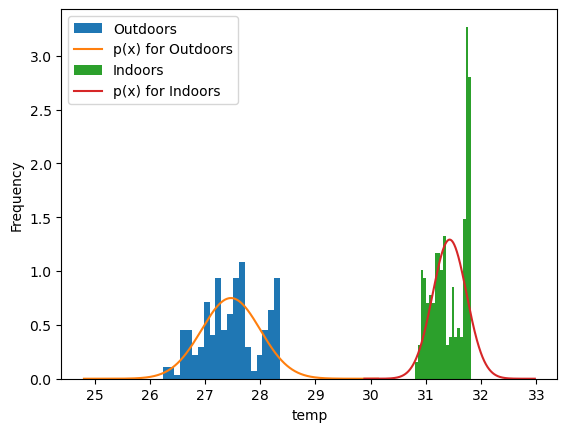

The mean uncertainty for outdoors is 856.172825845948
The mean uncertainty for indoors is 2570.5980354412313
Number of inside mean standard deviations: 2.1036671728361958


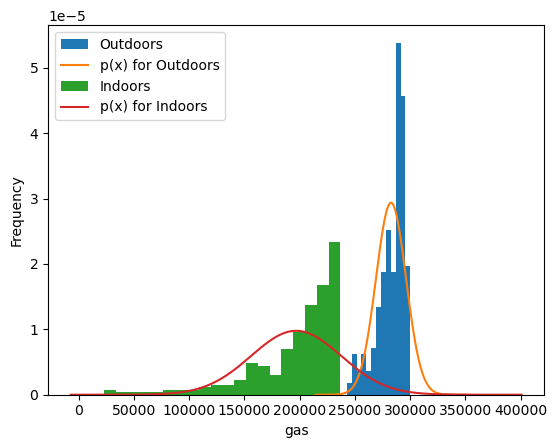

The mean uncertainty for outdoors is 0.048235046196313164
The mean uncertainty for indoors is 0.035260313909506916
Number of inside mean standard deviations: 0.8735941855836865


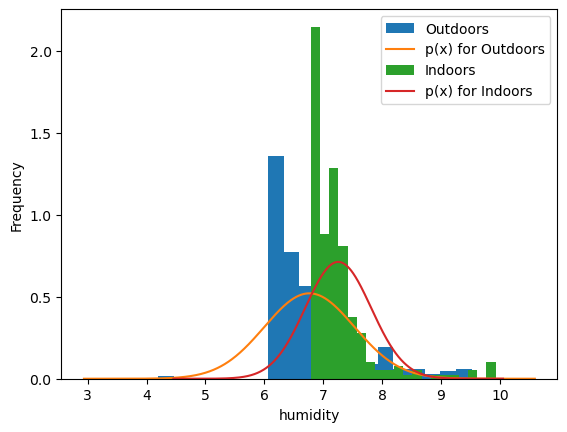

The mean uncertainty for outdoors is 0.006192552261966686
The mean uncertainty for indoors is 0.0006996083774853546
Number of inside mean standard deviations: 30.990710895499255


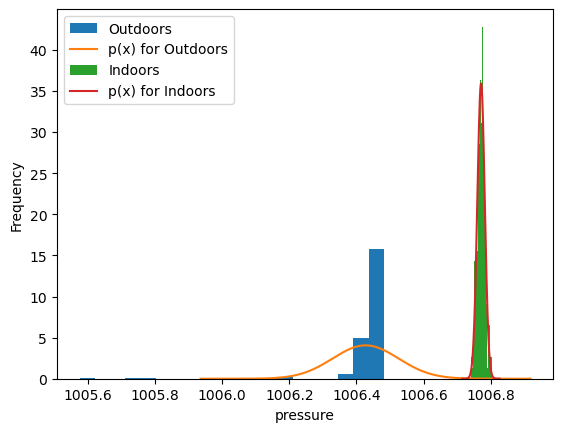

The mean uncertainty for outdoors is 0.051852386740283044
The mean uncertainty for indoors is 0.005855042909322196
Number of inside mean standard deviations: 30.995376862724452


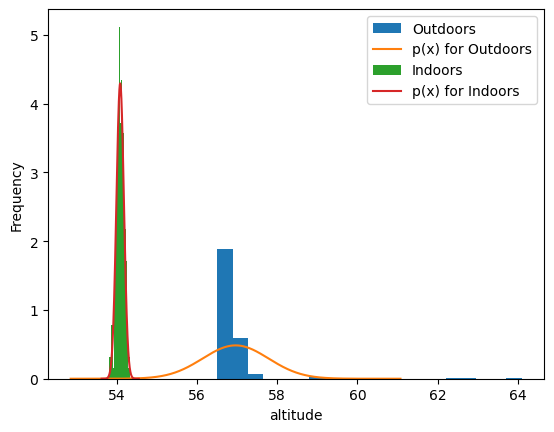

The mean uncertainty for outdoors is 0.0
The mean uncertainty for indoors is 0.0


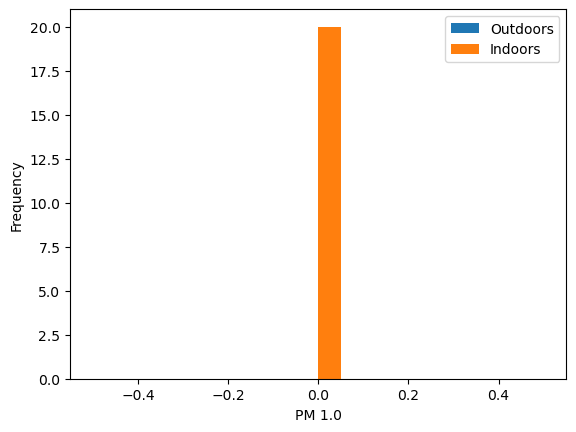

The mean uncertainty for outdoors is 0.0
The mean uncertainty for indoors is 0.0


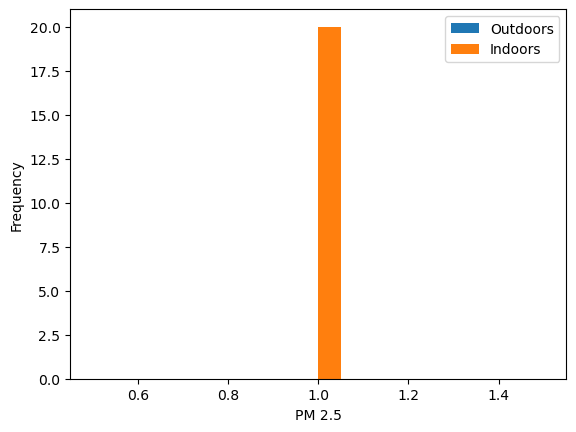

In [22]:
#Outdoor

# Read the CSV file
datafile1 = r'C:\Users\erich\Downloads\outside.csv'

# Read the CSV file
data1 = pd.read_csv(datafile1, skiprows=range(1, 152))

# Define a time array
time = range(len(data1))

# Plot each column against time in a separate plot 
for col in data1.columns[2:9]:
    plt.hist(data1[col], bins=20, density=True, label = 'Outdoors')
    mu1 = np.mean(data1[col])
    sigma1 = np.std(data1[col])
    if sigma1 != 0:
        x1 = np.linspace(mu1 - 5*sigma1, mu1 + 5*sigma1, 1000)
        y1 = norm.pdf(x1,mu1,sigma1)
        plt.plot(x1,y1, label = "p(x) for Outdoors")
    sem1 = sigma1 / np.sqrt(len(data1))
    print('The mean uncertainty for outdoors is '+str(sem1))

    plt.hist(data[col], bins=20, density=True, label = 'Indoors')
    mu = np.mean(data[col])
    sigma = np.std(data[col])
    if sigma != 0:
        x = np.linspace(mu - 5*sigma, mu + 5*sigma, 1000)
        y= norm.pdf(x,mu,sigma)
        plt.plot(x,y, label = "p(x) for Indoors")
    sem = sigma / np.sqrt(len(data))
    print('The mean uncertainty for indoors is '+str(sem))
    
    if sigma != 0:
        meandiff = abs(mu1 - mu)
        stds = meandiff / sigma
        print("Number of inside mean standard deviations:", stds)

    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

In [11]:
#Comment on results
print('The outdoor data has a generally has a higher mean and lower variance than the indoor data. \n')
print('If the distributions were not well described by a Gaussian, it is possible that the sample size was not large enough for the central limit theorem. The sum of a large number of independent and identically distributed random variables tends to follow a normal distribution.')

The outdoor data has a generally has a higher mean and lower variance than the indoor data. 

If the distributions were not well described by a Gaussian, it is possible that the sample size was not large enough for the central limit theorem. The sum of a large number of independent and identically distributed random variables tends to follow a normal distribution.


### Step 5: Comparing sensors
- Get data from another group in your lab and compare your inside data with their inside data, including all of elements from Step 4. Do the same comparing your outside data with their outside data.
- How do the sensors compare? What do you think this indicates about the accuracy and precision of your sensors?

The mean uncertainty for indoors, our data is 0.0
The mean uncertainty for indoors, their data is 718.9475630878873
Number of inside mean standard deviations: 3.5300854886323396


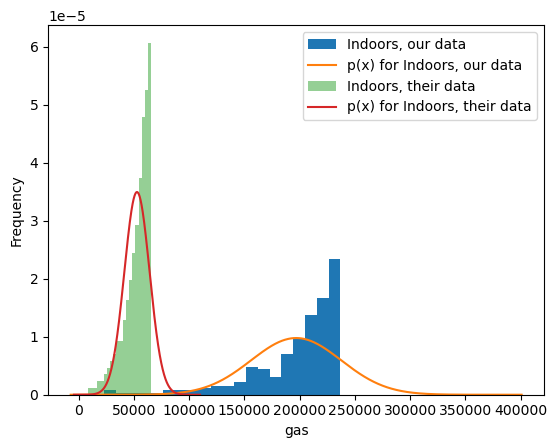

The mean uncertainty for indoors, our data is 0.0
The mean uncertainty for indoors, their data is 0.010501629834941241
Number of inside mean standard deviations: 15.910562453658763


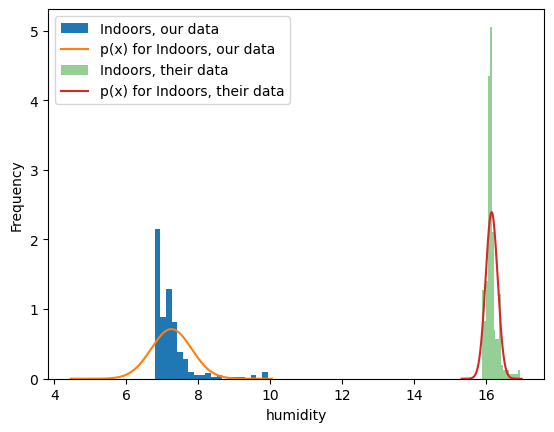

The mean uncertainty for indoors, our data is 0.0
The mean uncertainty for indoors, their data is 0.0007404330945754687
Number of inside mean standard deviations: 28.262265286436715


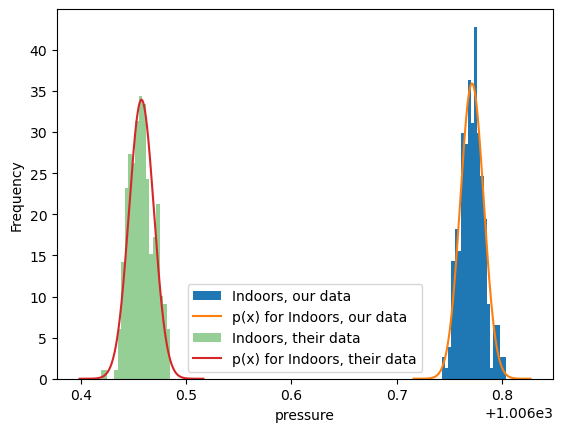

The mean uncertainty for indoors, our data is 0.0
The mean uncertainty for indoors, their data is 0.006198275642734094
Number of inside mean standard deviations: 28.2658601355519


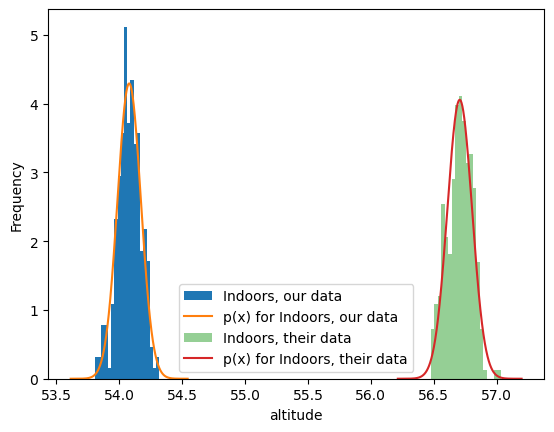

The mean uncertainty for indoors, our data is 0.0
The mean uncertainty for indoors, their data is 0.031496863260974825


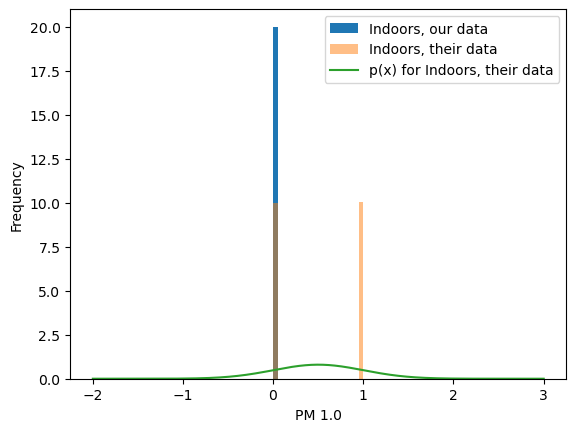

The mean uncertainty for indoors, our data is 0.0
The mean uncertainty for indoors, their data is 0.03949272131015768


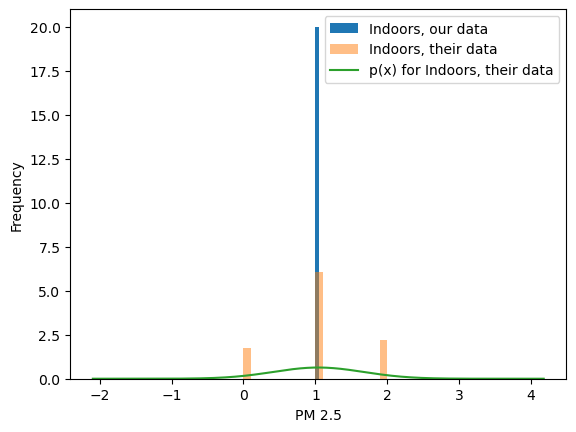

In [37]:
datafile2 = r'C:\Users\erich\Downloads\feb172023insidedata.csv'
data2 = pd.read_csv(datafile2)
data2 = data2[1:]
data2 = data2.rename(columns={'Concentration Units (Standard) PM 1.0': 'PM 1.0'})
data2 = data2.rename(columns={'Concentration Units (Standard) PM 2.5': 'PM 2.5'})
data2 = data2.rename(columns={'Concentration Units (Standard) PM 10.0': 'PM 10.0'})


data3 = data.drop(data.columns[0], axis=1)

# Define a time array
time = range(len(data1))

# Plot each column against time in a separate plot 
for col in data3.columns[2:8]:
    plt.hist(data3[col], bins=20, density=True, label = 'Indoors, our data')
    mu3 = np.mean(data[col])
    sigma3 = np.std(data[col])
    if sigma3 != 0:
        x3 = np.linspace(mu3 - 5*sigma3, mu3 + 5*sigma3, 1000)
        y3 = norm.pdf(x3,mu3,sigma3)
        plt.plot(x3,y3, label = "p(x) for Indoors, our data")
        sem = sigma / np.sqrt(len(data))
    print('The mean uncertainty for indoors, our data is '+str(sem))

    plt.hist(data2[col], bins=20, density=True, label = 'Indoors, their data', alpha = 0.5)
    mu2 = np.mean(data2[col])
    sigma2 = np.std(data2[col])
    if sigma2 != 0:
        x2 = np.linspace(mu2 - 5*sigma2, mu2 + 5*sigma2, 1000)
        y2 = norm.pdf(x2,mu2,sigma2)
        plt.plot(x2,y2, label = "p(x) for Indoors, their data")
        sem2 = sigma2 / np.sqrt(len(data3))
    print('The mean uncertainty for indoors, their data is '+str(sem2))
    
    if sigma3 != 0:
        meandiff1 = abs(mu3 - mu2)
        stds1 = meandiff1 / sigma3
        print("Number of inside mean standard deviations:", stds1)

    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

The mean uncertainty for outdoors, our data is 0.0
The mean uncertainty for outdoors, their data is 1475.2500681796296


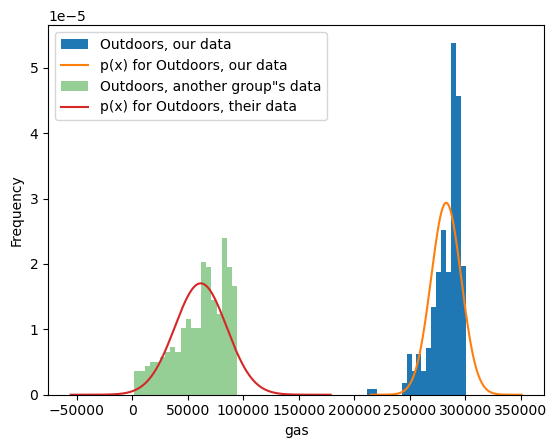

The mean uncertainty for outdoors, our data is 0.0
The mean uncertainty for outdoors, their data is 0.3882996309446068


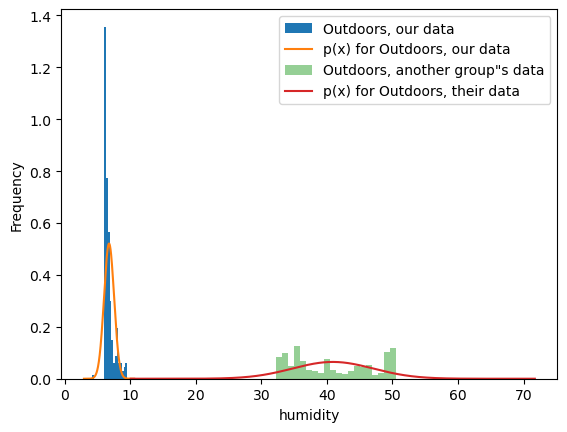

The mean uncertainty for outdoors, our data is 0.0
The mean uncertainty for outdoors, their data is 0.08251261448744948


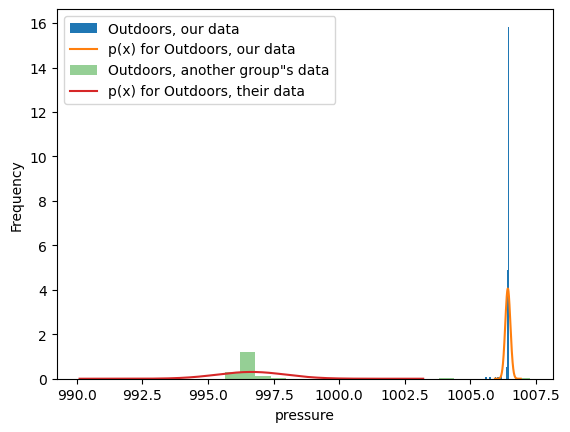

The mean uncertainty for outdoors, our data is 0.0
The mean uncertainty for outdoors, their data is 0.6940357422888558


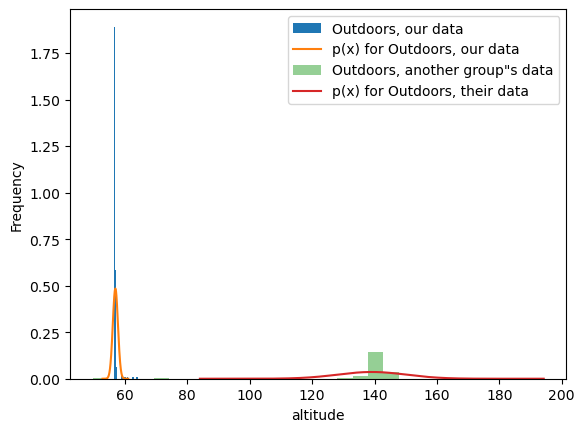

The mean uncertainty for outdoors, their data is 0.03465839811975426


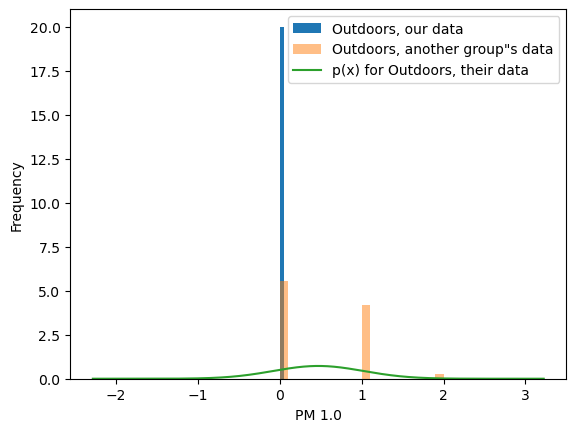

The mean uncertainty for outdoors, their data is 0.05459646002761309


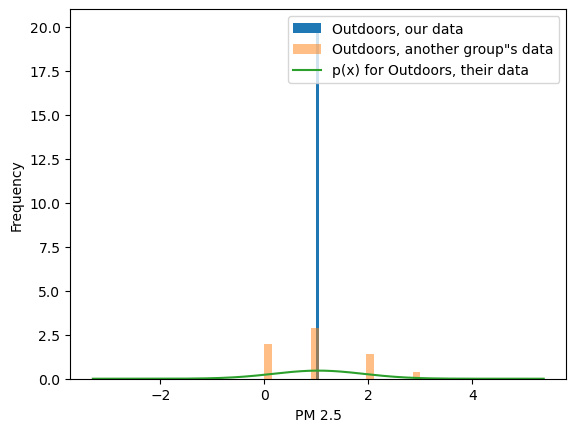

In [35]:
datafile4 = r'C:\Users\erich\Downloads\feb242023outsidedata.csv'
data4 = pd.read_csv(datafile4)
data4 = data4[1:]
data4 = data4.rename(columns={'Concentration Units (Standard) PM 1.0': 'PM 1.0'})
data4 = data4.rename(columns={'Concentration Units (Standard) PM 2.5': 'PM 2.5'})
data4 = data4.rename(columns={'Concentration Units (Standard) PM 10.0': 'PM 10.0'})

data5= data1.drop(data1.columns[0], axis=1)

# Define a time array
time = range(len(data1))

for col in data5.columns[2:8]:
    plt.hist(data5[col], bins=20, density=True, label = 'Outdoors, our data')
    mu5 = np.mean(data5[col])
    sigma5 = np.std(data5[col])
    if sigma5 != 0:
        x5 = np.linspace(mu5 - 5*sigma5, mu5 + 5*sigma5, 1000)
        y5 = norm.pdf(x5,mu5,sigma5)
        plt.plot(x5,y5, label = "p(x) for Outdoors, our data")
        sem5 = sigma1 / np.sqrt(len(data1))
    print('The mean uncertainty for outdoors, our data is '+str(sem))

    plt.hist(data4[col], bins=20, density=True, label = 'Outdoors, another group"s data', alpha = 0.5)
    mu4 = np.mean(data4[col])
    sigma4 = np.std(data4[col])
    if sigma4 != 0:
        x4 = np.linspace(mu4 - 5*sigma4, mu4 + 5*sigma4, 1000)
        y4 = norm.pdf(x4,mu4,sigma4)
        plt.plot(x4,y4, label = "p(x) for Outdoors, their data")
        sem4 = sigma4 / np.sqrt(len(data3))
    print('The mean uncertainty for outdoors, their data is '+str(sem4))
    
    if sigma5 != 0:
        meandiff = abs(mu4 - mu5)
        stds = meandiff / sigma5
        print("Number of inside mean standard deviations:", stds)

    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

### Extra: Correlations in data
- Plot temperature vs humidity
  - NOTE: These were taken by the same sensor at the same time, so each measurement matches up in time, meaning plotting one versus the other works. 
  - What is the hidden variable that is important when making plots like this?
- What does this plot show? Are temperature and humidity correlated? How might you quantify this?

- Plot temperature vs another property measured by that sensor, are they correlated? Is the correlation qualitatively similar to what you see from temperature vs humidity?
  - try this for all data types (temp. vs pressure, temp. vs voc, etc.)
  
- Plot temperature vs PM2.5 concentration and discuss as with the previous comparisons.

The hidden value is time. The data points plotted against each other were taken at the same time. 



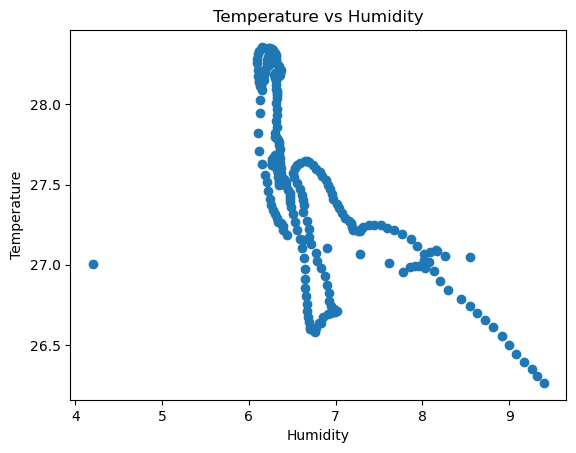

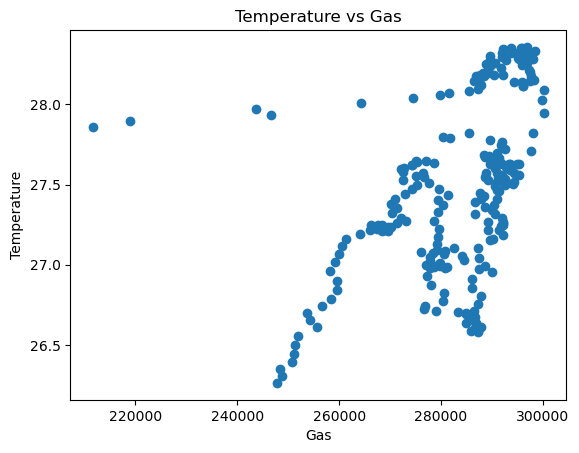

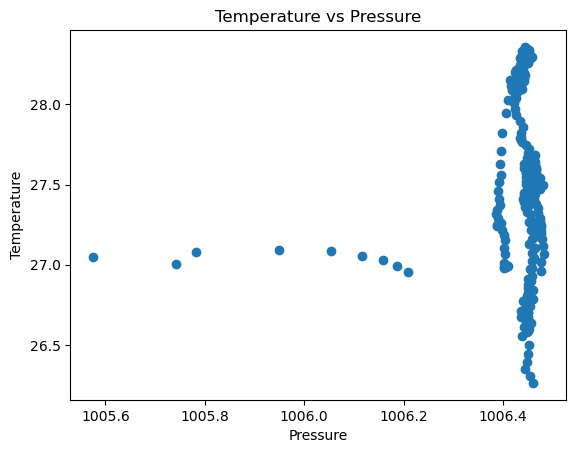

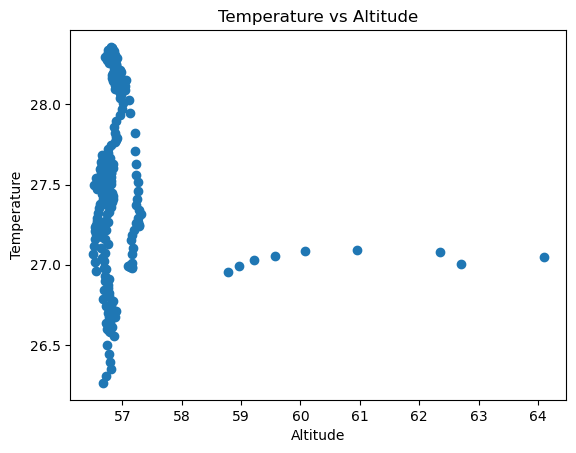

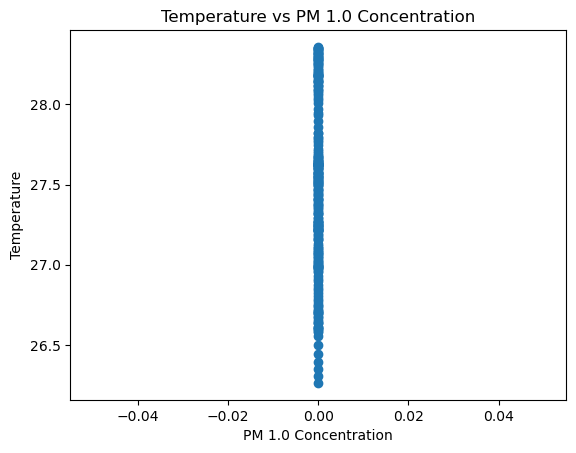

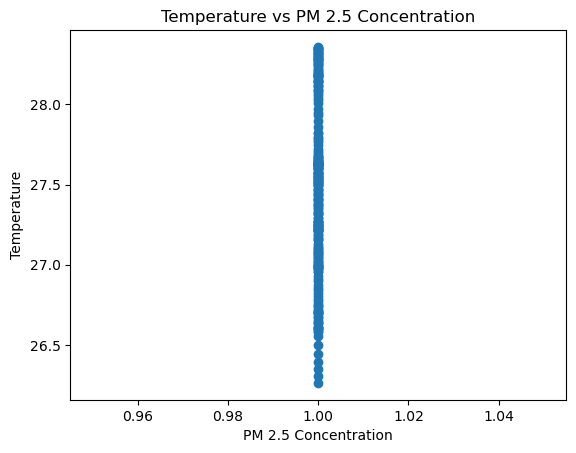

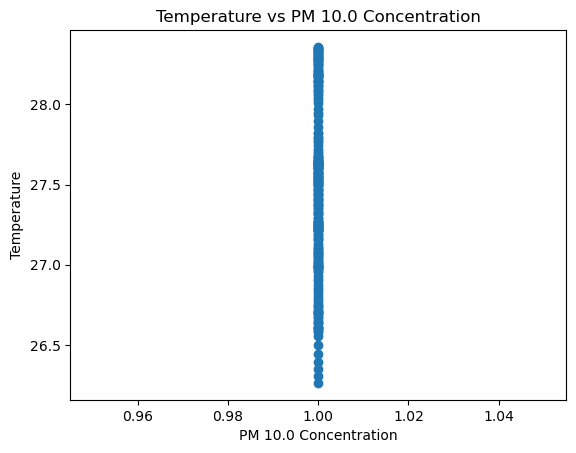

In [63]:
print('The hidden value is time. The data points plotted against each other were taken at the same time. \n')
#Our outdoor data
data6 = data1[1:]

plt.scatter(data6.iloc[:, 4], data6.iloc[:, 2])
plt.title('Temperature vs Humidity')
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.show()

plt.scatter(data6.iloc[:, 3], data6.iloc[:, 2])
plt.title('Temperature vs Gas')
plt.xlabel('Gas')
plt.ylabel('Temperature')
plt.show()

plt.scatter(data6.iloc[:, 5], data6.iloc[:, 2])
plt.title('Temperature vs Pressure')
plt.xlabel('Pressure')
plt.ylabel('Temperature')
plt.show()

plt.scatter(data6.iloc[:, 6], data6.iloc[:, 2])
plt.title('Temperature vs Altitude')
plt.xlabel('Altitude')
plt.ylabel('Temperature')
plt.show()

plt.scatter(data6.iloc[:, 7], data6.iloc[:, 2])
plt.title('Temperature vs PM 1.0 Concentration')
plt.xlabel('PM 1.0 Concentration')
plt.ylabel('Temperature')
plt.show()

plt.scatter(data6.iloc[:, 8], data6.iloc[:, 2])
plt.title('Temperature vs PM 2.5 Concentration')
plt.xlabel('PM 2.5 Concentration')
plt.ylabel('Temperature')
plt.show()

plt.scatter(data6.iloc[:, 9], data6.iloc[:, 2])
plt.title('Temperature vs PM 10.0 Concentration')
plt.xlabel('PM 10.0 Concentration')
plt.ylabel('Temperature')
plt.show()

In [69]:
print('As the humidity increased, temperature decreased. This could be quantified by the R value correlation coefficient, which is a measure of the strength and direction of the linear relationship between two variables')
r = np.corrcoef(data6.iloc[:, 4], data6.iloc[:, 2])[0, 1]
print('The correlation coefficient between temperature and humidity is:', r)

r1 = np.corrcoef(data6.iloc[:, 3], data6.iloc[:, 2])[0, 1]
print('\nNext, temperature and gas were plotted. As temperature increased, gas increased. The correlation coefficient between temperature and humidity is:', r1)

print('\nTemperature did not change the PM 2.5 concentration. There is no correlation between temperature and PM 2.5 concentration, so the R value is 0.')

As the humidity increased, temperature decreased. This could be quantified by the R value correlation coefficient, which is a measure of the strength and direction of the linear relationship between two variables
The correlation coefficient between temperature and humidity is: -0.6702235384550291

Next, temperature and gas were plotted. As temperature increased, gas increased. The correlation coefficient between temperature and humidity is: 0.4558363106260654

Temperature did not change the PM 2.5 concentration. There is no correlation between temperature and PM 2.5 concentration, so the R value is 0.
